In [26]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics as m
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCVl̥

In [27]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/blood_transfusion.csv'
df = pd.read_csv(url)
df

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,donated
1,0,13,3250,28,donated
2,1,16,4000,35,donated
3,2,20,5000,45,donated
4,1,24,6000,77,not donated
...,...,...,...,...,...
743,23,2,500,38,not donated
744,21,2,500,52,not donated
745,23,3,750,62,not donated
746,39,1,250,39,not donated


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Recency    748 non-null    int64 
 1   Frequency  748 non-null    int64 
 2   Monetary   748 non-null    int64 
 3   Time       748 non-null    int64 
 4   Class      748 non-null    object
dtypes: int64(4), object(1)
memory usage: 29.3+ KB


In [29]:
df.Class.value_counts()

not donated    570
donated        178
Name: Class, dtype: int64

In [30]:
X = df.drop('Class', axis=1)
y = df.Class

LabelEnc = LabelEncoder()
y = LabelEnc.fit_transform(y)

In [31]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC())
])

params = {
    'model__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
}

grid = GridSearchCV(pipeline, param_grid=params, cv=3, n_jobs=-1)
grid.fit(X, y)
result = pd.DataFrame(grid.cv_results_)
grid.best_params_

{'model__kernel': 'rbf'}

              precision    recall  f1-score   support

           0       1.00      0.03      0.05        37
           1       0.76      1.00      0.86       113

    accuracy                           0.76       150
   macro avg       0.88      0.51      0.46       150
weighted avg       0.82      0.76      0.66       150



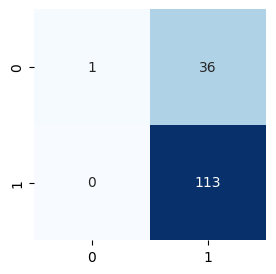

In [32]:
import seaborn as sns
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
cf = m.confusion_matrix(ytest, ypred)
fig, ax = plt.subplots(figsize=(3, 3))
_ = sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
print(m.classification_report(ytest, ypred))


KNN

In [36]:
pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])

params = {
    'model__n_neighbors': [3, 5, 7, 9, 11],
}

grid = GridSearchCV(pipeline2, param_grid=params, cv=3, n_jobs=-1)
grid.fit(X, y)
result2 = pd.DataFrame(grid.cv_results_)
result2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004176,0.000622,0.009848,0.002362,3,{'model__n_neighbors': 3},0.464,0.763052,0.746988,0.658013,0.137345,5
1,0.004840,0.000626,0.012030,0.001232,5,{'model__n_neighbors': 5},0.596,0.763052,0.771084,0.710046,0.080709,2
2,0.005181,0.000473,0.011530,0.000818,7,{'model__n_neighbors': 7},0.616,0.763052,0.771084,0.716712,0.071290,1
3,0.004676,0.000229,0.010869,0.000933,9,{'model__n_neighbors': 9},0.544,0.763052,0.779116,0.695390,0.107249,4
4,0.005692,0.001436,0.010476,0.000934,11,{'model__n_neighbors': 11},0.584,0.763052,0.779116,0.708723,0.088436,3


              precision    recall  f1-score   support

           0       0.52      0.30      0.38        37
           1       0.80      0.91      0.85       113

    accuracy                           0.76       150
   macro avg       0.66      0.60      0.62       150
weighted avg       0.73      0.76      0.73       150



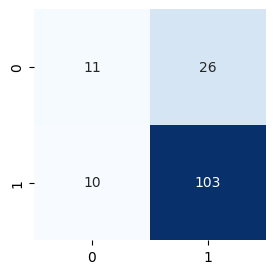

In [37]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=7)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
cf = m.confusion_matrix(ytest, ypred)
fig, ax = plt.subplots(figsize=(3, 3))
_ = sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
print(m.classification_report(ytest, ypred))

In [38]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [39]:
smote = SMOTE()
Xsmote, ysmote = smote.fit_resample(X, y)
Xsmote.shape, ysmote.shape

((1140, 4), (1140,))

In [41]:
rus = RandomUnderSampler()
Xrus, yrus = rus.fit_resample(X, y)
Xrus.shape, yrus.shape

((356, 4), (356,))